Data: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
data = pd.read_csv("data.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Data Preprocessing
# Remove the 'id' column as it's not needed for clustering or modeling
data = data.drop(columns=["id"])

In [5]:
# Encode the diagnosis column: 'M' -> 1 (Malignant), 'B' -> 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
# Separate features and target variable
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

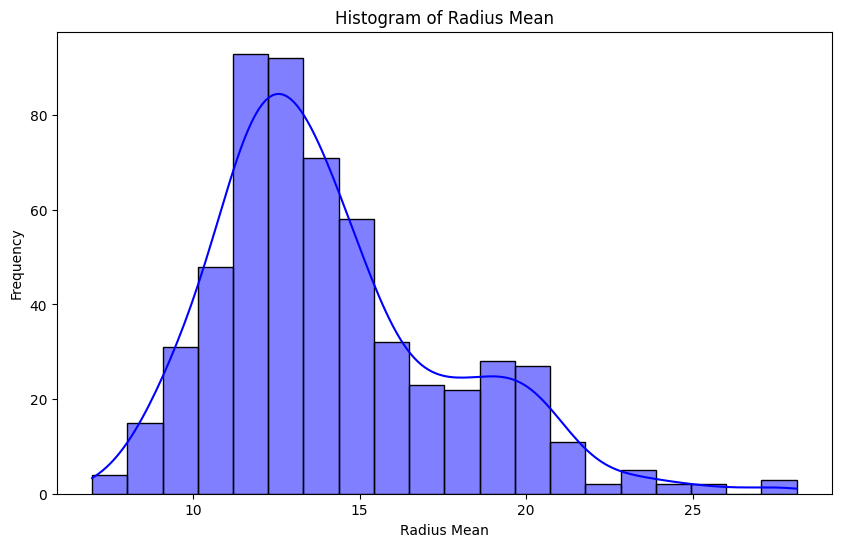

In [9]:
# 1. Histogram/Bar Chart/Pie Chart (Histogram of a feature)
plt.figure(figsize=(10, 6))
sns.histplot(data['radius_mean'], kde=True, color='blue', bins=20)
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.show()

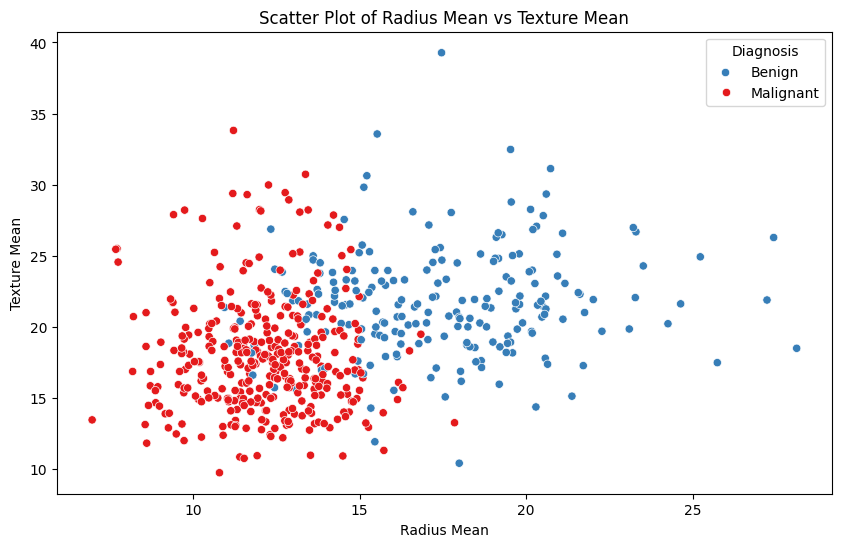

In [10]:
# 2. Line/Scatter Graph (Scatter Plot of two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['radius_mean'], y=data['texture_mean'], hue=data['diagnosis'], palette='Set1')
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

In [11]:
# 3. Confusion Matrix (Heatmap of Confusion Matrix)
# Train a Logistic Regression Model for demonstration
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

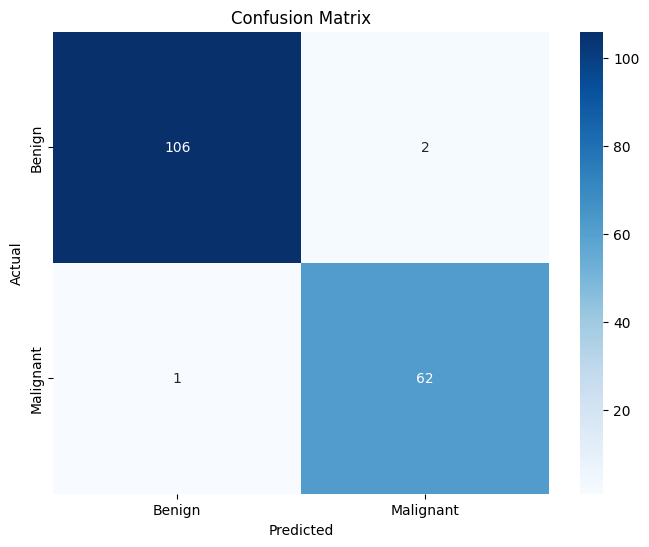

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

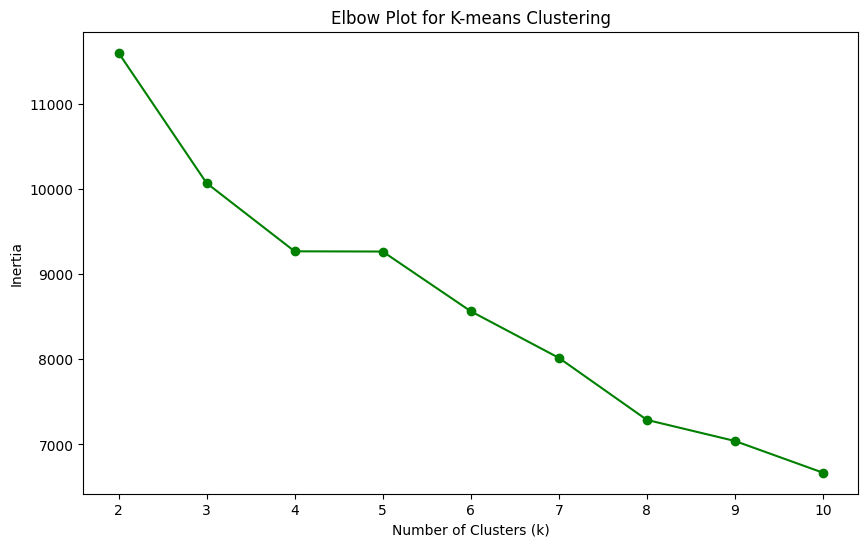

In [13]:
# 4. Elbow Plot (Elbow plot for K-means Clustering)
# K-Means Clustering
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='green')
plt.title("Elbow Plot for K-means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

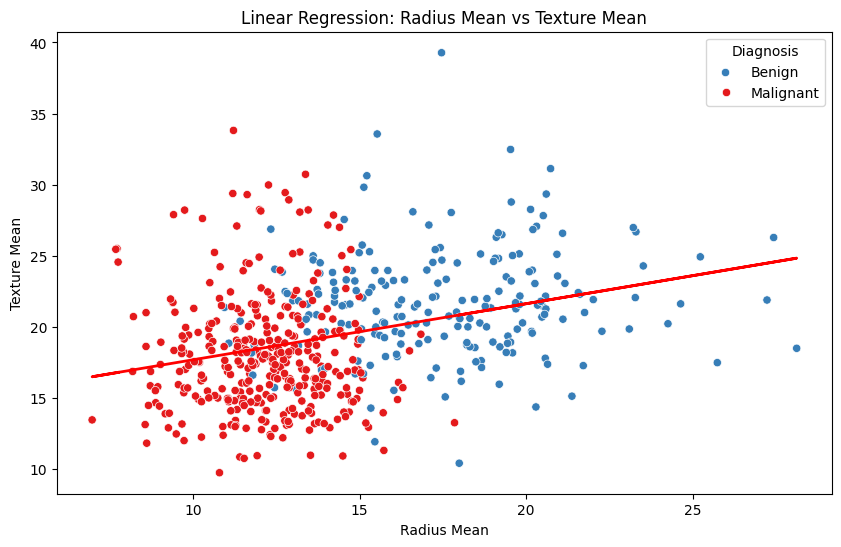

In [16]:
# 5. Line Fitting (Linear Regression Line)
# Let's fit a line for the relationship between radius_mean and texture_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['radius_mean'], y=data['texture_mean'], hue=data['diagnosis'], palette='Set1')

# Fit a linear regression line
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_line = data['radius_mean'].values.reshape(-1, 1)
y_line = data['texture_mean'].values
regressor.fit(X_line, y_line)
y_pred_line = regressor.predict(X_line)

# Plot the regression line
plt.plot(data['radius_mean'], y_pred_line, color='red', lw=2)
plt.title("Linear Regression: Radius Mean vs Texture Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()